In [1]:
import numpy as np

# 使用一阶多项式模型进行线性回归
线性回归是一种基本的统计方法，用于建模两个变量之间的关系。在二维数据中，我们可以使用一阶多项式模型来描述这种关系。该模型的形式为：
\[\hat{y} = \theta_0 + \theta_1 \cdot x\]

其中：
- \(\hat{y}\) 是预测值。
- \(x\) 是自变量（输入）。
- \(\theta_0\) 是截距（intercept）。
- \(\theta_1\) 是斜率（slope）。

## 模型的组成部分
### 1. 初始化参数
在模型的初始化过程中，我们通常将参数\(\theta_0\)和\(\theta_1\)初始化为零：


In [4]:
def __init__(self):
    """Linear regression using a first order polynomial model for 2D data."""
    self._theta = np.zeros(2)  # 创建一个包含两个元素的NumPy数组，并将这两个元素都初始化为0
    """
    在这个__init__方法中，我们使用np.zeros(2)来初始化一个包含两个元素的数组_theta，这两个元素分别代表线性回归模型的截距和斜率。这样，模型在开始时的预测将是一个水平线。
    """

### 2. 预测方法
预测方法用于根据输入数据生成预测值。其实现如下：

In [5]:
def predict(self, X):
    """Predicts outputs y from some input X. For a first order polynomial, 
        this is the line \hat y_i = \theta_0 + \theta_1 \cdot x_i . Note that 
        the shape of the input X is (n, 1), and the shape of your prediction 
        should be (n, )."""
    return self._theta[0] + self._theta[1] * X.flatten()
    """ X.flatten()将输入的形状从(n,1) 转换为(n,) 以便与参数_theta[1]相乘。最终返回的预测结果是一个一维数组形状为(n,)"""
    """ 在(n,1)中有n行1列,在(n,)中,只有n行,没有列的维度,表示这是一个一维数组。"""

In [ ]:
a=np.array([[1,2],[3,4]])
print(a)
print(a.flatten())

### 3. 评分方法
评分方法用于计算模型的残差平方和，以评估模型的拟合效果。其实现如下：

In [ ]:
def score(self, X, y):
    """Returns the sum of squares residual for the given inputs and outputs."""
    """方法用于计算给定输入X和输出y的残差平方和（Sum of Squares Residual, SSR）这是一个衡量模型预测与实际数据之间差异的指标 """
    predictions = self.predict(X)
    residuals = y - predictions
    sum_of_squares_residual = np.sum(residuals ** 2)
    return sum_of_squares_residual

### The Whole Code

In [4]:
class SimpleLinearRegression:
    def __init__(self):
        self._theta = np.zeros(2)

    def predict(self, X):
        return self._theta[0] + self._theta[1] * X.flatten()

    def fit(self, X, y):
        """This method finds the slope and intercept for your data."""
        assert isinstance(X, np.ndarray), "X should be a numpy array"
        assert X.ndim == 2, "X should be a 2D array"
        assert isinstance(y, np.ndarray), "X should be a numpy array"
        assert y.ndim == 1, "y should be a 1D array"
        assert X.shape[0] == y.shape[0], "The number of datapoints in X and y must match"
        """使用NumPy的polyfit函数计算线性回归的斜率和截距.
        X.ravel()将X展平为一维数组，以便与y进行计算。1表示我们要拟合的是一阶多项式（线性）。 """
        slope, intercept = np.polyfit(X.ravel(), y, 1) 
        self._theta[0] = intercept
        self._theta[1] = slope

    def score(self, X, y): 
        """Returns the sum of squares residual for the given inputs and outputs."""
        # TODO Your code here ... (and remember to remove the exception)
        predictions = self.predict(X)
        residuals = y - predictions
        sum_of_squares_residual = np.sum(residuals ** 2)
        return sum_of_squares_residual

In [ ]:
# Example data
X = np.vstack(np.linspace(0, 10, num=10))
y = X.ravel()*2 + 3 + np.random.normal(0, 1, size=len(X))

# Plot the data
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(X.ravel(), y, 'o', label="Data")
model = SimpleLinearRegression()
plt.plot(X.ravel(), model.predict(X), '-', label="Untrained model")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(X.ravel(), y, 'o', label="Data")
model.fit(X, y)
plt.plot(X.ravel(), model.predict(X), '-', label="Trained model")
plt.legend()
plt.show()

## 维度的定义
- 列数可以与维度相关联，但在数组的上下文中，维度的定义更为严格。
1. 维度（Dimension）：
在数学和计算机科学中，维度通常指的是数据的独立方向或轴。
一维数组（1D array）只有一个维度，例如 (𝑛,)，表示有 n 个元素。
二维数组（2D array）有两个维度，例如 (𝑛,2)，表示有 n 行和 2 列。
三维数组（3D array）有三个维度，例如 (𝑛,3,𝑚)，表示有 n 个 2D 数组，每个数组有 3 行和 m 列。

2.列数与维度的关系：
在二维数组中，列数可以被视为第二个维度，但这并不意味着列数本身就是维度。
例如，形状为(n,3) 的数组是一个二维数组，表示有 n 行和 3 列，但它并不意味着这是三维数据。
总结：
形状为 (n,3) 的数组是一个二维数组，表示有 n 行和 3 列，而不是三维数据。
维度的数量是由数组的维度数决定的，而不是由列数决定的。

In [ ]:
#assert
b = 5
assert b < 0,"x must be positive"

In [ ]:
# isistance()
x = 5
print(isinstance(x, int))
print(isinstance(x, str))
print(isinstance(x,list))

In [5]:
### Output
# Example data
"""
np.linspace 是NumPy库中的一个函数，用于生成在指定范围内均匀分布的数字。
np.vstack 是 NumPy 中的一个函数，用于将多个数组按垂直方向（行）堆叠在一起。
在这个例子中np.linspace 生成的数组是一个一维数组（形状为 (10,)），而 np.vstack 会将其转换为一个二维数组（形状为 (1, 10)），即将这个一维数组作为一行放入一个新的二维数组中.
"""
X = np.vstack(np.linspace(0, 10, num=10)) 
""" 
生成一个目标变量 y，它与特征变量 X 之间存在线性关系（y = 2x + 3），并且在此基础上添加了来自正态分布的随机噪声。
这样的数据生成方式在模拟线性回归问题时非常常见，能够帮助我们测试和验证线性回归模型的效果。
"""
y = X.ravel()*2 + 3 + np.random.normal(0, 1, size=len(X))

In [6]:
print(X)

[[ 0.        ]
 [ 1.11111111]
 [ 2.22222222]
 [ 3.33333333]
 [ 4.44444444]
 [ 5.55555556]
 [ 6.66666667]
 [ 7.77777778]
 [ 8.88888889]
 [10.        ]]


In [7]:
print(y)

[ 5.65129728  4.5019942   6.42919857  9.88585343 12.04315042 13.50331655
 16.71283817 18.61898516 21.67777726 23.53216425]


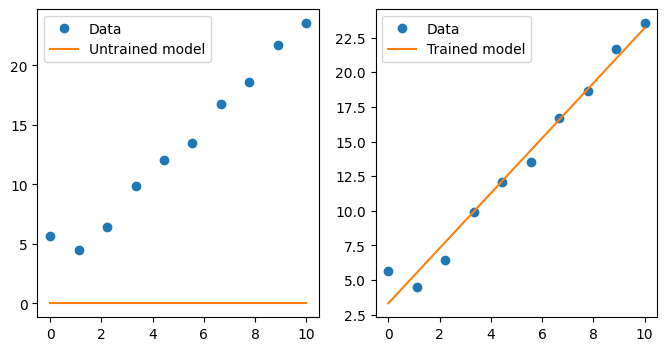

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(X.ravel(), y, 'o', label="Data")
model = SimpleLinearRegression()
plt.plot(X.ravel(), model.predict(X), '-', label="Untrained model")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(X.ravel(), y, 'o', label="Data")
model.fit(X, y)
plt.plot(X.ravel(), model.predict(X), '-', label="Trained model")
plt.legend()
plt.show()